## Surfinpy

#### Tutorial 2 - Introducing temperature dependence

In tutorial 1 we generated a phase diagram at 0 K.  However, this is not representative of normal conditions.  Temperature is an important consideration for materials chemistry and we may wish to evaluate the phase thermodynamic stability at various synthesis conditions.  In order to overcome this and intorrduce temperature we need to modife the equations from tutorial 1.  This example will again be using the MgO-CO<sub>2</sub>-H<sub>2</sub>O system.

##### Methodology

As before the free energy can be calculated using;

\begin{align}
\Delta G^{0}_{f} = \sum\Delta G_{f}^{0,\text{products}} - \sum\Delta G_{f}^{0,\text{reactants}}
\end{align}


Where for this tutorial the free energy (G) for solid phases  is equal to is equal to the calculated DFT energy (U<sub>0</sub>). For gaseous species, the standard free energy varies significantly with temperature, and as DFT simulations are designed for condensed phase systems, we use experimental data to determine the temperature dependent free energy term for gaseous species, where $S_{\text{expt}}(T)$ is specific entropy value for a given T and  $H-H^0(T)$ is the , both can be obtained from the NIST database and can be calculated as;

\begin{align}
G =  U_0 + (H-H^0(T) - T S_{\text{expt}}(T))
\end{align}


##### Code

In [1]:
from surfinpy import bulk_mu_vs_mu as bmvm
from surfinpy import utils as ut
from surfinpy import data

Same as tutorial 1 we first need to enter the DFT data in to the various data classes and create a list of the data.

In [2]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10)

In [3]:
MgO = data.DataSet(cation = 10, x = 0, y = 0, energy = -92.0, label = "Periclase")
Art = data.DataSet(cation = 10, x = 5, y = 20, energy = -468.0, label = "Artinite")
Bru = data.DataSet(cation = 10, x = 0, y = 10, energy = -228.0, label = "Brucite")
Nes = data.DataSet(cation = 10, x = 10, y = 30, energy = -706.0, label = "Nesquehonite")
Mag = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.0, label = "Magnesite")
Lan = data.DataSet(cation = 10, x = 10, y = 50, energy = -972.0, label = "Lansfordite")
Hyd = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.0, label = "Hydromagnesite")

In [4]:
data = [MgO, Art, Bru, Nes,  Mag, Lan, Hyd]

In [5]:
x_energy=-20.53412969
y_energy=-12.83725889

In order to calculate $S_{\text{expt}}(T)$ for H<sub>2</sub>O and CO<sub>2</sub> we need to use experimental data from the NSIT JANAF database.  As a user you will need to download the tables for the species you are interested in (in this example water and carbon dioxide).  SurfinPy has a function that can read this data, assuming it is in the correct format and calculate the temperature correction for you.  Provide the math to the file and the temperature you want.

In [6]:
CO2_exp = ut.fit_nist("CO2.txt")[298]
Water_exp = ut.fit_nist("H2O.txt")[298]

CO2_corrected = x_energy + CO2_exp
Water_corrected = y_energy + Water_exp

deltaX = {'Range': [ -3, 2],  'Label': 'CO_2'}
deltaY = {'Range': [ -3, 2], 'Label': 'H_2O'}

CO2_corrected and H2O_corrected are now temperature depenent terms correcsponding to a temperature of 298 K.  The resulting phase diagram will now be at a temperature of 298 K.

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


<AxesSubplot:xlabel='$\\Delta \\mu_{\\mathrm{H_2O}}$ (eV)', ylabel='$\\Delta \\mu_{\\mathrm{CO_2}}$ (eV)'>

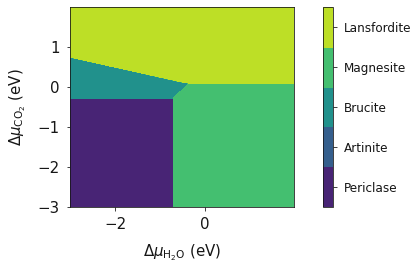

In [7]:
system = bmvm.calculate(data, bulk, deltaX, deltaY, x_energy=CO2_corrected, y_energy=Water_corrected)

system.plot_phase(temperature=298)